In [1]:
## Clone the Github Repo

import shutil
import os, sys
import json

shutil.rmtree('/content/cen_sierra_pywr_new', ignore_errors=True)
!git clone https://github.com/Maburidi/cen_sierra_pywr_new.git
sys.path.insert(0,'/content/cen_sierra_pywr_new/')

%cd /content/cen_sierra_pywr_new/


Cloning into 'cen_sierra_pywr_new'...
remote: Enumerating objects: 14321, done.
remote: Counting objects: 100% (3093/3093), done.
remote: Compressing objects: 100% (1863/1863), done.
remote: Total 14321 (delta 1282), reused 2907 (delta 1191), pack-reused 11228 (from 1)
Receiving objects: 100% (14321/14321), 913.62 MiB | 14.21 MiB/s, done.
Resolving deltas: 100% (6740/6740), done.
Updating files: 100% (1477/1477), done.
/content/cen_sierra_pywr_new


In [2]:
# Install Pywr

!bash install_dependencies.sh

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 9.0 MB/s eta 0:00:00


In [13]:
# Run the Model

# A folder called "results" will be created, where the results will be stored. Similar thing for loggs

# Arguments:
# -b: ['stanislaus', 'tuolumne', 'merced', 'upper_san_joaquin', 'all']

!python main.py -b upper_san_joaquin -s 1990 -e 1992 -d False


2024-11-04 18:44:30.045 | INFO     | sierra.run_basin_model:_run_model:79 - Running "development" scenario for UPPER_SAN_JOAQUIN basin, HISTORICAL/LIVNEH climate
2024-11-04 18:44:31.453 | INFO     | sierra.run_basin_model:_run_model:92 - No NaNs found in data files
2024-11-04 18:44:31.462 | INFO     | sierra.run_basin_model:_run_model:227 - Parameters Imported
2024-11-04 18:44:31.480 | INFO     | sierra.run_basin_model:_run_model:244 - upper_san_joaquin Policy Parameters Imported
2024-11-04 18:44:31.481 | INFO     | sierra.run_basin_model:_run_model:248 - Domains imported
2024-11-04 18:44:31.482 | INFO     | sierra.run_basin_model:_run_model:337 - Loading daily model
2024-11-04 18:44:33.614 | INFO     | sierra.run_basin_model:_run_model:343 - Model Loaded Successfully
2024-11-04 18:44:33.614 | INFO     | sierra.run_basin_model:_run_model:345 - Setup model
/usr/local/lib/python3.10/dist-packages/pywr/dataframe_tools.py:127: FutureWarning: Resampling with a PeriodIndex is deprecated. Cas

In [4]:
############################## MODEL COMPONENTS #################################

import json
#print(json.dumps(base_model, indent=4))

basin = 'stanislaus'
'''
Model Components:
  0- metadata
  00- timestepper
  000- solver
  1- Nodes
  2- Edges
  3- tables
  4- scenarios
  5- parameters
  6- Recorders
'''

model_path = '/content/cen_sierra_pywr_new/sierra/models/' + basin + '/pywr_model_updated.json'

with open(model_path, 'r') as f:
    base_model = json.load(f)

nodes_data = base_model.get('nodes', [])
edges_data = base_model.get('edges', [])
tables_data = base_model.get('tables', [])
scenarios_data = base_model.get('scenarios', [])
parameters_data = base_model.get('parameters', [])
Recorders_data = base_model.get('recorders', [])


print(f'Number of Nodes = {len(nodes_data)}')
print(f'Number of Edges = {len(edges_data)}')
print(f'Number of Tabels = {len(tables_data)}')
print(f'Number of Scenarios = {len(scenarios_data)}')
print(f'Number of Parameters = {len(parameters_data)}')
print(f'Number of Recorders = {len(Recorders_data)}')


Number of Nodes = 79
Number of Edges = 92
Number of Tabels = 26
Number of Scenarios = 0
Number of Parameters = 151
Number of Recorders = 101


In [5]:
##################### NODES ######################
index = 1
print(f'Example of a Node = {nodes_data[index]}')

node_types = []
for i in range(len(nodes_data)):
    node_types.append(nodes_data[i].get('type'))

node_types = list(set(node_types))
print(f'type of existing nodes = {node_types}')

################### EDGES ####################
print(f'Example of an Edge = {edges_data[0]}')

Example of a Node = {'name': 'Angels Canal Outflow Inflow', 'type': 'Catchment', 'flow': 'Angels Canal Outflow Inflow/Runoff', 'comment': '{"resource_class": "node"}'}
type of existing nodes = ['Hydropower', 'River', 'InstreamFlowRequirement', 'Output', 'Link', 'Catchment', 'PiecewiseLink', 'Reservoir', 'BreakLink']
Example of an Edge = ['Angels Canal Outflow', 'Angels PH']


In [6]:
################### TABLES ###################
print(f'All Tables = {list(tables_data.keys())}')

print(f'Example of a Table name = {list(tables_data.keys())[0]}')
print(f'Example of a Table contents = {list(tables_data.values())[0]}')


All Tables = ['Full Natural Flow Forecast', 'functional flows metrics', 'Annual Full Natural Flow', 'Peak Donnells Runoff', 'WYT P2005 & P2130', 'WYT P2019', 'New Melones Storage Regression', 'San Joaquin Valley Index', 'Storage Costs', 'All Energy Price Values', 'Energy Price Blocks', 'Energy Price Values', 'Initial Storage', 'Lake Tulloch Flood Control', 'New Melones Lake Flood Control', 'New Spicer Meadow District release', 'IFR Below Relief Reservoir schedule', 'IFR Below Pinecrest Lake schedule', 'IFR Below Donnell Lake schedule', 'Supplemental IFR below Donnell Lake', 'IFR Below Sand Bar Div Schedule', 'Supplemental IFR below Sand Bar Div', 'IFR Below Philadelphia Div Schedule', 'IFR bl Goodwin Dam schedule', 'Oakdale Irrigation District Demand', 'South San Joaquin Irrigation District Demand']
Example of a Table name = Full Natural Flow Forecast
Example of a Table contents = {'url': '/content/cen_sierra_pywr/data/Stanislaus_River/hydrology/historical/Livneh/preprocessed/exceedanc

In [7]:
############################### PARAMETERS ##############################
print(f'All PARAMETERS = {list(parameters_data.keys())}')
print(f'Number of Papramters = { len(list(parameters_data.keys()))}')

index = 1
print(f'Example of a PARAMETER name = {list(parameters_data.keys())[index]}')
print(f'Example of a PARAMETER contents = {list(parameters_data.values())[index]}')



All PARAMETERS = ['Full Natural Flow', 'Blocks', 'Price Year', 'New Melones Lake/Water Year Type', 'South San Joaquin Irrigation District/Demand', 'Oakdale Irrigation District/Demand', 'Water Supply Release bl New Spicer Meadow Reservoir/Requirement', 'Angels PH/Fixed Head', 'Angels PH/Turbine Capacity', 'Angels PH/Water Demand/1', 'Angels PH/Water Demand/2', 'Angels PH/Cost/1', 'Angels PH/Cost/2', 'Angels PH/Cost/3', 'Beardsley Reservoir/Turbine Capacity', 'Beardsley Reservoir/Storage Value', 'Beardsley Reservoir/Elevation', 'Beardsley PH/Turbine Capacity', 'Collierville PH/Fixed Head', 'Collierville PH/Turbine Capacity', 'Collierville PH/Water Demand/1', 'Collierville PH/Water Demand/2', 'Collierville PH/Cost/1', 'Collierville PH/Cost/2', 'Collierville PH/Cost/3', 'Donnell Lake Spill/Min Flow', 'Donnells PH/Fixed Head', 'Donnells PH/Turbine Capacity', 'Donnells PH/Water Demand/1', 'Donnells PH/Water Demand/2', 'Donnells PH/Cost/1', 'Donnells PH/Cost/2', 'Donnells PH/Cost/3', 'Donnell

In [8]:
############################### RECORDERS ###############################
print(f'All Recorders = {list(Recorders_data.keys())}')
print(f'Number of Recorders = { len(list(Recorders_data.keys()))}')

index = 0
print(f'Example of a Recorders name = {list(Recorders_data.keys())[index]}')
print(f'Example of a Recorders contents = {list(Recorders_data.values())[index]}')

recorders_types = []
rec_values = list(Recorders_data.values())
for i in range(len(rec_values)):
    recorders_types.append(rec_values[i].get('type'))
recorders_types = list(set(recorders_types))
print(f'type of existing recoreders = {recorders_types}')



All Recorders = ['Angels PH/flow', 'Beardsley PH/flow', 'Spring Gap PH/flow', 'Stanislaus PH/flow', 'Sand Bar PH/flow', 'Phoenix PH/flow', 'New Melones PH/flow', 'Murphys PH/flow', 'Collierville PH/flow', 'Donnells PH/flow', 'New Spicer Meadow PH/flow', 'Angels PH/energy', 'Beardsley PH/energy', 'Spring Gap PH/energy', 'Stanislaus PH/energy', 'Sand Bar PH/energy', 'Phoenix PH/energy', 'New Melones PH/energy', 'Murphys PH/energy', 'Collierville PH/energy', 'Donnells PH/energy', 'New Spicer Meadow PH/energy', 'Beardsley Reservoir/elevation', 'Beardsley Reservoir/storage', 'Beardsley Reservoir/cost', 'Donnells Reservoir/storage', 'Donnells Reservoir/cost', 'Hunter Reservoir/storage', 'IFR bl Angels Div/flow', 'IFR bl Angels Div/min flow', 'IFR bl Collierville PH discharge/flow', 'IFR bl Collierville PH discharge/min flow', 'IFR bl Collierville PH discharge/max flow', 'IFR bl Donnell Lake/flow', 'IFR bl Donnell Lake/min flow', 'IFR bl Donnell Lake/max flow', 'IFR bl Hunter Reservoir/flow',

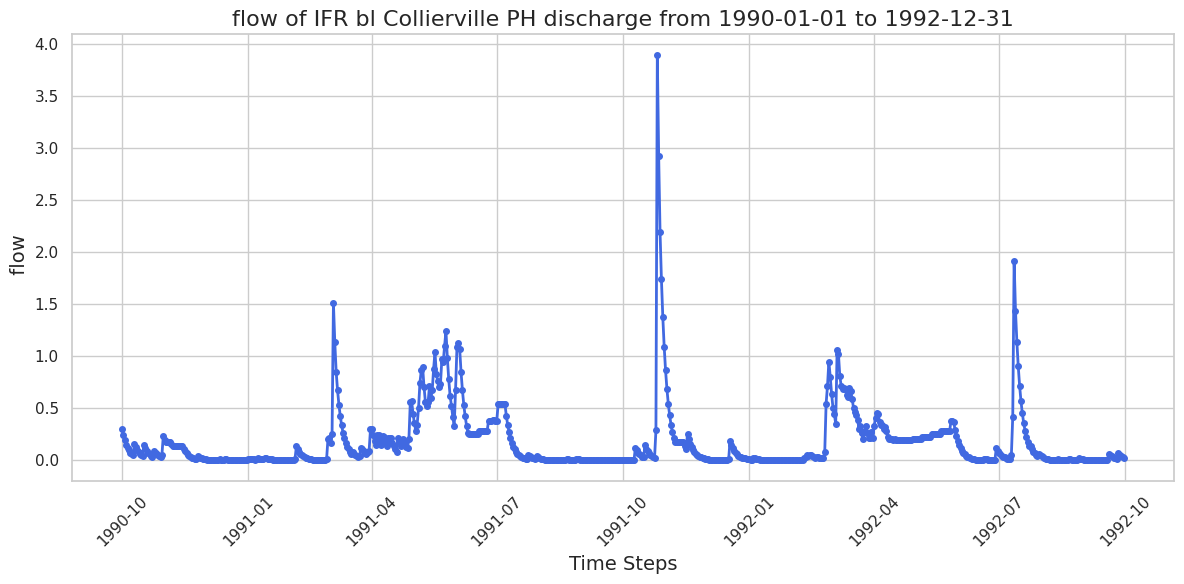

In [9]:
################################# VISUALIZATION ################################
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

index = 30
basin = 'stanislaus'                #['stanislaus', 'tuolumne', 'merced', 'upper_san_joaquin']
scen = 'development'
start_date = '1990-01-01'
end_date = '1992-12-31'

all_rec = list(Recorders_data.keys())
node, attribute = all_rec[index].split("/")

res_file = os.path.join('/content/cen_sierra_pywr_new/results', 'all_recorders_output1.csv')

df = pd.read_csv(res_file)

sns.set(style="whitegrid")

df['Date'] = pd.to_datetime(df['Date'])

filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

plt.figure(figsize=(12, 6))
plt.plot(filtered_df['Date'], filtered_df[node], marker='o', color="royalblue", linewidth=2, markersize=4)

plt.title(f"{attribute} of {node} from {start_date} to {end_date}", fontsize=16)
plt.xlabel("Time Steps", fontsize=14)
plt.ylabel(f" {attribute}", fontsize=14)

plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("/content/cen_sierra_pywr_new/results/" + node +'_reco.png', format="png", dpi=300)  # Save as PNG with 300 DPI for quality

plt.show()


Plot flow at node IFR bl NF Stanislaus Div Res


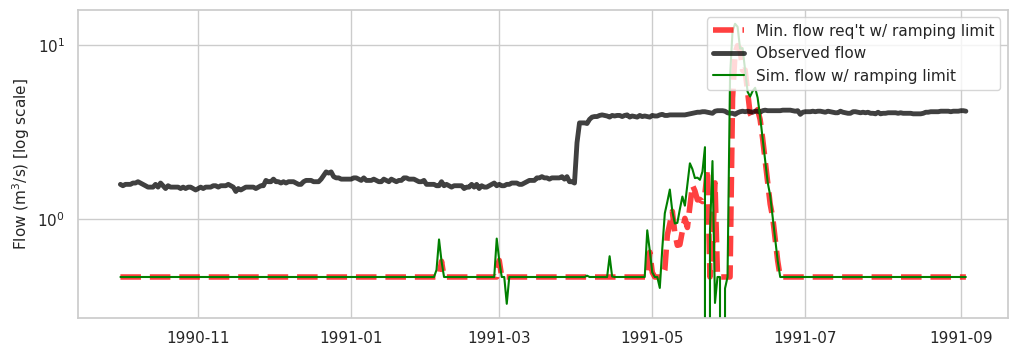

In [14]:
########### Environmental flows Plots

from analyses.manuscript_figures.New_figs.Environmental_flows import *
import pandas as pd

basin = 'stanislaus'     #['stanislaus', 'tuolumne', 'merced', 'upper_san_joaquin']
scen = 'development'
start = '1990-10-01'
end = '1991-09-03'
svsfigs_path = os.path.join('/content/cen_sierra_pywr_new/results/', scen, basin)

#-------------------------------------------------------------------------------

p1 = os.path.join('/content/cen_sierra_pywr_new/results', scen, basin, 'historical/Livneh/InstreamFlowRequirement_Flow_mcm.csv')
df1 = pd.read_csv(p1)
p2 = os.path.join('/content/cen_sierra_pywr_new/results', scen, basin, 'historical/Livneh/InstreamFlowRequirement_Max Flow_mcm.csv')
df2 = pd.read_csv(p2)
p3 = os.path.join('/content/cen_sierra_pywr_new/results', scen, basin, 'historical/Livneh/InstreamFlowRequirement_Min Flow_mcm.csv')
df3 = pd.read_csv(p3)

column_names1 = df1.columns.tolist()
column_names2 = df2.columns.tolist()
column_names3 = df3.columns.tolist()
common_elements = list(set(column_names1) & set(column_names2) & set(column_names3))
#-------------------------------------------------------------------------------

index = 8
node = common_elements[index]
print(f'Plot flow at node {node}' )

plot_environmental_flows(basin, node , svsfigs_path,start, end, scen)


/content/cen_sierra_pywr_new/results/development/stanislaus


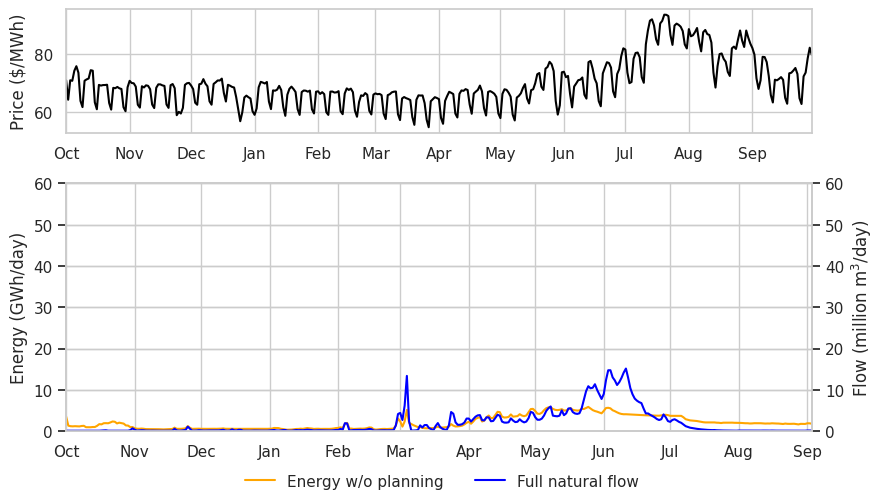

In [11]:
########### usj Energy

from analyses.manuscript_figures.New_figs.usj_energy import *

start = '1990-10-01'
end = '1991-09-03'
basin = "stanislaus"       #['stanislaus', 'tuolumne', 'merced', 'upper_san_joaquin']
scen = 'development'
svsfigs_path = os.path.join('/content/cen_sierra_pywr_new/results/', scen, basin)
print(svsfigs_path)

plot_basin_energy(basin,scen, start, end, svsfigs_path)



<ipython-input-17-4fc3ae99ca92>:64: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.resample('M').sum() / 1e3
<ipython-input-17-4fc3ae99ca92>:64: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.resample('M').sum() / 1e3
<ipython-input-17-4fc3ae99ca92>:92: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.resample('M').mean()
<ipython-input-17-4fc3ae99ca92>:92: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.resample('M').mean()
<ipython-input-17-4fc3ae99ca92>:117: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(month_labels)
<ipython-input-17-4fc3ae99ca92>:126: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. afte

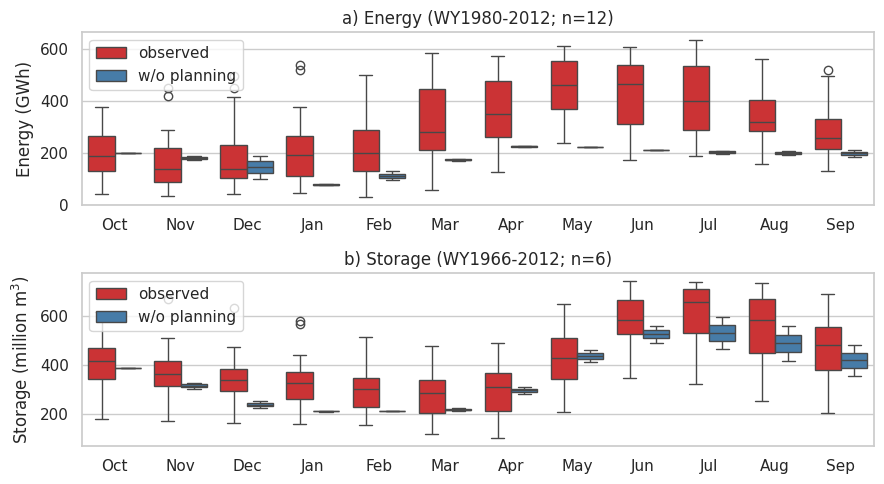

In [17]:
start = '1990-10-01'
end = '1991-09-03'
basin = "upper_san_joaquin"       #['stanislaus', 'tuolumne', 'merced', 'upper_san_joaquin']
scen = 'development'
svsfigs_path = os.path.join('/content/cen_sierra_pywr_new/results/', scen, basin)


import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# file_suffix = date.today().strftime('%Y-%m-%d')
# suffix = ' - {}'.format(file_suffix) if file_suffix else ''
suffix = ''

local_obs_dir = '/content/cen_sierra_pywr_new/data/observed/'

input_dir = '/content/cen_sierra_pywr_new/data'

output_dir = '/content/cen_sierra_pywr_new/results/'



no_opt_path = Path(output_dir, scen + suffix)
#opt_path = Path(output_dir, 'planning' + suffix)
scenario_names = ['observed', 'w/o planning']

if basin == "stanislaus":
    pp = 'Stanislaus_River'
elif basin == "upper_san_joaquin":
    pp = 'Upper_San_Joaquin_River'
elif basin == "tuolumne":
    pp = 'Tuolumne_River'
else:
    pp = 'Merced_River'


facilities_path = Path(local_obs_dir, 'runoff/Upper San Joaquin River/ObservedData_USJ.csv')
facilities_list = pd.read_csv(facilities_path, dtype=str)
modeled_names = [str(s) for s in facilities_list['Name (Model)']]
observed_names = [str(s) for s in facilities_list['Name (Observed)']]

# storage data
scenarios = ['observed', scen]
dfs = []
for i, scenario in enumerate(scenarios):
    run_name = scenario + suffix
    if scenario == 'observed':
        fp = Path(local_obs_dir, 'energy/monthly_hydro_1980_2018_MWh.csv')
        df = pd.read_csv(fp, index_col=0, header=0, parse_dates=True).dropna(axis=1)
        df = df[[c for c in df if c in observed_names]]
    else:
        fp = Path(output_dir, run_name ,  'upper_san_joaquin/historical/Livneh/Hydropower_Energy_MWh.csv')
        df = pd.read_csv(fp, index_col=0, header=0, parse_dates=True)
        df = df[[c for c in df if c in modeled_names]]

    df = df.loc['1980-10-01':'2012-09-30']
    #     print(scenario)
    #     print(df.head())
    df = df.sum(axis=1).to_frame()
    df.columns = ['Total']
    df = df.resample('M').sum() / 1e3
    df['scenario'] = scenario_names[i]
    df['year'] = df.index.year
    df['month'] = df.index.month
    df['month'] = [m - 9 if m >= 10 else m + 3 for m in df['month']]
    df = df.reset_index()
    del df['Date']
    df = df.set_index(['scenario', 'year', 'month'])
    dfs.extend([df])

df_energy = pd.concat(dfs, axis=0).reset_index()
df_energy.head()

# storage data
dfs = []
for i, scenario in enumerate(scenarios):
    if scenario == 'observed':
        fp = Path(input_dir, pp + '/gauges/storage_mcm.csv')
    else:
        fp = Path(output_dir, run_name, basin + '/historical/Livneh/Reservoir_Storage_mcm.csv')

    df = pd.read_csv(fp, index_col=0, header=0, parse_dates=True)
    #     df_millerton = df[[c for c in df if 'millerton' in c.lower()]].sum(axis=1)
    df = df[[c for c in df if 'millerton' not in c.lower()]].sum(axis=1).to_frame()
    #     df = pd.concat([df_upper_basin, df_millerton], axis=1)
    #     df.columns = ['Millerton Lake', 'Upper Basin']
    df.columns = ['Total']
    df = df.loc['1965-10-01':'2012-09-30']
    df = df.resample('M').mean()
    df['scenario'] = scenario_names[i]
    df['year'] = df.index.year
    df['month'] = df.index.month
    df['month'] = [m - 9 if m >= 10 else m + 3 for m in df['month']]
    df = df.reset_index()
    del df['Date']
    df = df.set_index(['scenario', 'year', 'month'])
    dfs.extend([df])
df_storage = pd.concat(dfs, axis=0).reset_index()
df_storage.head()

# plot data
fig, axes = plt.subplots(2, 1, figsize=(9, 5))

ylabel_energy = 'Energy (GWh)'
ylabel_storage = 'Storage (million m$^3$)'
month_labels = ['Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep']

# Subplot: Energy
ax = axes[0]
sns.boxplot(data=df_energy, x='month', y='Total', hue='scenario', ax=ax)
ax.set_title('a) Energy (WY1980-2012; n=12)')
ax.set_ylabel(ylabel_energy)
ax.set_xlabel('')
ax.set_xticklabels(month_labels)
ax.legend(loc='upper left')

# Subplot: Storage
ax = axes[1]
sns.boxplot(data=df_storage, x='month', y='Total', hue='scenario', ax=ax)
ax.set_title('b) Storage (WY1966-2012; n=6)')
ax.set_ylabel(ylabel_storage)
ax.set_xlabel('')
ax.set_xticklabels(month_labels)
ax.legend(loc='upper left')

fig.tight_layout()
fig.savefig( '/content/cen_sierra_pywr_new/results/' + scen + '/'+ basin + '/usj aggregated energy and storage.png', dpi=600)

plt.show()